## Load data from CSV

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head(5)

,longitude,latitude
0,43.535355,1.518987
1,43.535355,1.518984
2,43.535354,1.518987
3,43.535354,1.519985
4,43.535354,1.518987


## Compute optimal bounding box

In [3]:
center = (df.latitude.mean(), df.longitude.mean())
print(f'{center=}')

# Find the best bounding box
ratio        = 2
padding      = 0.0005
delta_lat    = df.latitude.max()  - df.latitude.min()
delta_long   = df.longitude.max() - df.longitude.min()
delta_lat_2  = delta_lat / 2.0
delta_long_2 = delta_long / 2.0

if delta_lat > (delta_long * ratio):
    # Latitude is wider
    half_long    = ((delta_lat_2 + padding) / ratio)
    bounding_box = (df.latitude.min() - padding, df.latitude.max() + padding,
                    center[1] - half_long,  center[1] + half_long)
else:
    # Longitude is wider
    half_lat     = ((delta_long_2 + padding) * ratio)
    bounding_box = (center[0] - half_lat, center[0] + half_lat,
                    df.longitude.min() - padding, df.longitude.max() + padding)

print(f'{bounding_box=}')
print(f'Actual bounding box ratio = {(bounding_box[1] - bounding_box[0]) / (bounding_box[3] - bounding_box[2])}')

center=(1.5190799166666669, 43.535353833333325)
bounding_box=(1.518484, 1.5204849999999999, 43.53485358333332, 43.53585408333333)
Actual bounding box ratio = 1.9999999999928981


## Download map on OpenStreetMap

In [4]:
import requests

# Retrieve a valid token from a browser request in OpenStreetMap
token = "351888"

params = {
    "bbox" : f"{bounding_box[0]},{bounding_box[2]},{bounding_box[1]},{bounding_box[3]}",
    "scale" : "784",
    "format" : "png"
}

r = requests.get('https://render.openstreetmap.org/cgi-bin/export', params=params, cookies={"_osm_totp_token":token})

if r.status_code == 200:
    with open('map.png', 'wb') as f:
        f.write(r.content)
    print('Map successfully downloaded to map.png')
else:
    print(f'ERROR {r.status_code} : {r.content}')

Map successfully downloaded to map.png


## Load map and plot recorded points

In [5]:
ruh_m = plt.imread('map.png')

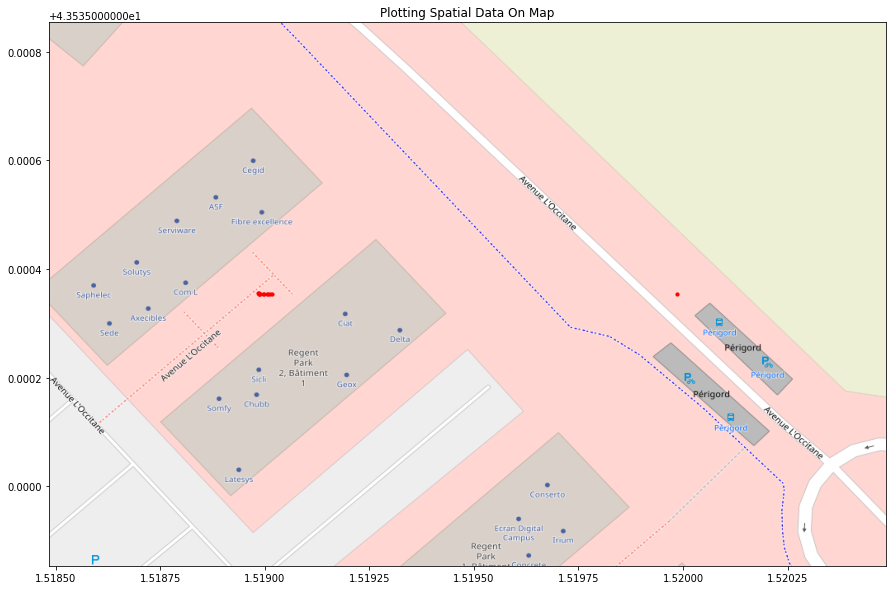

In [6]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.scatter(df.latitude, df.longitude, zorder=1, alpha= 1.0, c='r', s=10)
ax.set_title('Plotting Spatial Data On Map')
ax.set_xlim(bounding_box[0], bounding_box[1])
ax.set_ylim(bounding_box[2], bounding_box[3])
ax.imshow(ruh_m, zorder=0, extent = bounding_box, aspect= 'auto')